In [47]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [49]:
# For dataset and DataLoader
from torch.utils.data import Dataset,DataLoader
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

In [50]:
url = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


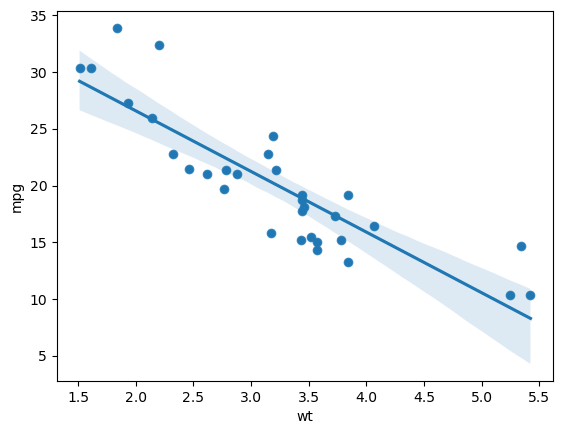

In [51]:
sns.scatterplot(x='wt',y='mpg',data=df)
sns.regplot(x='wt',y='mpg',data=df);


In [52]:
X_list = df.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = df.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np)

In [53]:
class LinearRegressionDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    

train_loader = DataLoader(dataset=LinearRegressionDataset(X_np,y_np),batch_size=2)

In [54]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    
    def forward(self,X):
        out = self.linear(X)
        return out

In [55]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_size=input_dim,output_size=output_dim)
model.train()

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [56]:
loss_fun = nn.MSELoss()

In [57]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [63]:
net = NeuralNetRegressor(
    model,
    max_epochs= 100,
    lr= learning_rate,
    iterator_train__shuffle=  True
)

In [64]:
net.set_params(train_split=False, verbose = 0)
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs' : [10,200,500]
}
gs = GridSearchCV(net,param_grid=params,scoring='r2',cv=3,verbose=2)
gs.fit(X,y)

print(f"the best score: {gs.best_index_}, best params: {gs.best_params_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.3s
[CV] END ............................lr=0.02, max_epochs=500; total time=   1.0s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.8s
[CV] END ............................lr=0.02, max_epochs=500; total time=   1.1s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END ...................

c:\Users\naman\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
c:\Users\naman\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [-2.83439136e+00 -4.93788878e-01  3.53949885e-01 -2.51971372e+00
  3.54763011e-01  5.86798608e-01 -9.18470382e+01 -6.44963083e+19
            -inf]
  warnings.warn(
c:\Users\naman\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1113: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


the best score: 5, best params: {'lr': 0.05, 'max_epochs': 500}


In [65]:
for i,(X,y) in enumerate(train_loader):
    print(f"{i}th Batch")
    print("Independent feature")
    print(f"{X}")
    print(f"{X.shape}")
    print("Dependent feature")
    print(f"{y}")
    print(f"{y.shape}")

0th Batch
Independent feature
tensor([[2.6200],
        [2.8750]])
torch.Size([2, 1])
Dependent feature
tensor([[21.],
        [21.]])
torch.Size([2, 1])
1th Batch
Independent feature
tensor([[2.3200],
        [3.2150]])
torch.Size([2, 1])
Dependent feature
tensor([[22.8000],
        [21.4000]])
torch.Size([2, 1])
2th Batch
Independent feature
tensor([[3.4400],
        [3.4600]])
torch.Size([2, 1])
Dependent feature
tensor([[18.7000],
        [18.1000]])
torch.Size([2, 1])
3th Batch
Independent feature
tensor([[3.5700],
        [3.1900]])
torch.Size([2, 1])
Dependent feature
tensor([[14.3000],
        [24.4000]])
torch.Size([2, 1])
4th Batch
Independent feature
tensor([[3.1500],
        [3.4400]])
torch.Size([2, 1])
Dependent feature
tensor([[22.8000],
        [19.2000]])
torch.Size([2, 1])
5th Batch
Independent feature
tensor([[3.4400],
        [4.0700]])
torch.Size([2, 1])
Dependent feature
tensor([[17.8000],
        [16.4000]])
torch.Size([2, 1])
6th Batch
Independent feature
tensor

In [24]:
losses = []
slopes, biases = [], []
NUM_EPOCHS = 1000
BATCH_SIZE= 2

for epoch in range(NUM_EPOCHS):
    for i ,(X,y) in enumerate(train_loader):
        optimizer.zero_grad()

        y_pred = model(X)

        loss = loss_fun(y_pred, y)

        losses.append(loss.item())

        loss.backward()

        optimizer.step()

    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slopes.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                biases.append(param.data.numpy()[0])

    losses.append(float(loss.data))

    if epoch%100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.data}') 
            

Epoch: 0, Loss: 31.130088806152344
Epoch: 100, Loss: 1.5550777912139893
Epoch: 200, Loss: 1.411370038986206
Epoch: 300, Loss: 1.409427285194397
Epoch: 400, Loss: 1.409427285194397
Epoch: 500, Loss: 1.409427285194397
Epoch: 600, Loss: 1.409427285194397
Epoch: 700, Loss: 1.409427285194397
Epoch: 800, Loss: 1.409427285194397
Epoch: 900, Loss: 1.409427285194397


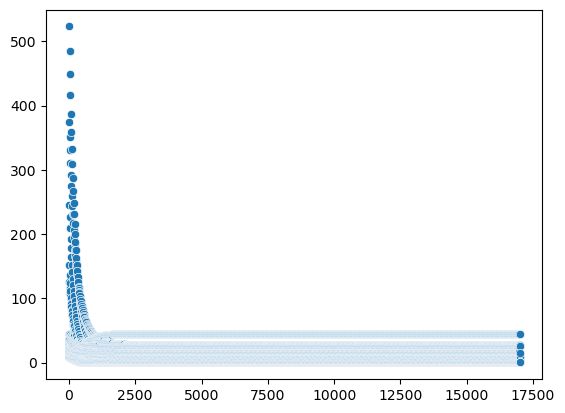

In [28]:
sns.scatterplot(x=range(len(losses)),y=losses);

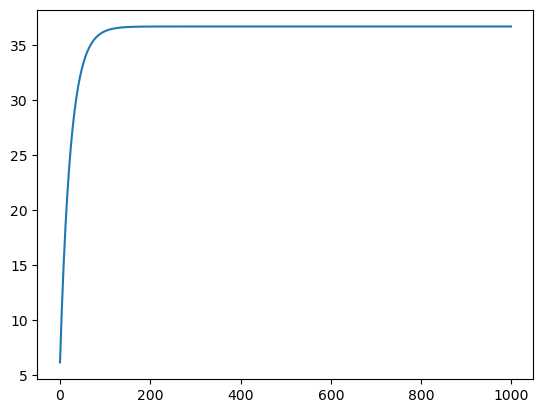

In [29]:
sns.lineplot(x=range(NUM_EPOCHS), y=biases);

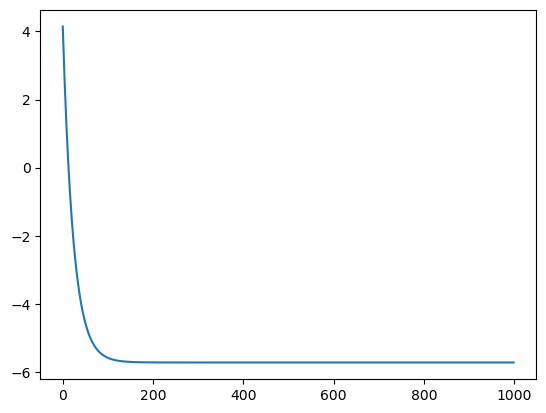

In [30]:
sns.lineplot(x=range(NUM_EPOCHS), y=slopes);

In [33]:
# SAVING AND LOADING


# SAVING THE MODEL
# torch.save(model.state_dict(),PATH)
# LOADING THE MODEL
# torch.load_state_dict() 


# code for loading
# model  = The model Class(*args,**kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()



# LOADS COMPLETE MODEL
# torch.load()


model.state_dict()
torch.save(model.state_dict(),'model_state_dict.pth')


In [34]:
model = LinearRegression(input_size=input_dim,output_size=output_dim)
model.load_state_dict(torch.load('model_state_dict.pth'))

C:\Users\naman\AppData\Local\Temp\ipykernel_15272\1566694087.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_state_dict.pth'))


<All keys matched successfully>

In [35]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

when you do hyper parmater tuning 

you look for 

<ol>
<li>Network Topology</li>
<li>Number of nodes</li>
<li>layer types</li>
<li>network objects</li>
<li>loss function</li>
<li>optimizer</li>
<li>model training</li>
<li>learning rate</li>
<li>batch size</li>
<li>number of epochs</li>
</ol>

<br>
You can use libraries like 

<ul>
<li>rayTune</li>
<li>Optuna</li>
<li>skorch</li>
</ul>

Approach 


<code>Grid Search</code> 
<br>
<code>Random Search</code>
<br>